<a href="https://colab.research.google.com/github/FAKIHAKHAN/Deep-Learning-Projects/blob/main/Image_Classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNNs on CIFAR 10 - Classification

In the notebook, I imported dataset cifar10 and performed classification using CNN without a transfer learning model.First I will create a model without batch normalization,then I will add 2 layers and evaluate comparison.  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import clone_model, Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Traning set labels: {y_train.shape}")
print(f"Test set labels: {y_test.shape}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Traning set labels: (50000, 1)
Test set labels: (10000, 1)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
plt.figure(figsize=(15,15))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [ ]:
# what is an image?
X_train[0][0][0]

In [ ]:
np.max(X_train), np.min(X_train)

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

In [ ]:
plt.bar(unique, counts)
plt.show()

## 2. CNN for Image Classification

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.InputLayer(input_shape=(32,32, 3)))
cnn_model.add(layers.Conv2D(40, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(70, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Conv2D(64, (3, 3), padding='same'))
cnn_model.add(layers.Conv2D(24, (3, 3), padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 40)     │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 70)     │        25,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        40,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 24)     │        13,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,648 (1.06 MB)

 Trainable params: 278,648 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow import keras

callbacks = [
keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
]


In [ ]:
cnn_history = cnn_model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=256,
                    validation_split=0.2,callbacks=callbacks)

Epoch 1/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.1415 - loss: 9.0613 - val_accuracy: 0.2701 - val_loss: 2.0035 - learning_rate: 0.0010
Epoch 2/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.2599 - loss: 1.9748 - val_accuracy: 0.4074 - val_loss: 1.6311 - learning_rate: 0.0010
Epoch 3/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.3800 - loss: 1.6809 - val_accuracy: 0.4879 - val_loss: 1.4258 - learning_rate: 0.0010
Epoch 4/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.4533 - loss: 1.5096 - val_accuracy: 0.5207 - val_loss: 1.3474 - learning_rate: 0.0010
Epoch 5/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4988 - loss: 1.3857 - val_accuracy: 0.5673 - val_loss: 1.2066 - learning_rate: 0.0010
Epoch 6/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5445 - loss: 1.2789 - val_accuracy: 0.5973 - val_loss: 1.1337 - learning_rate: 0.0010
Epoch 7/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5693 - loss: 1

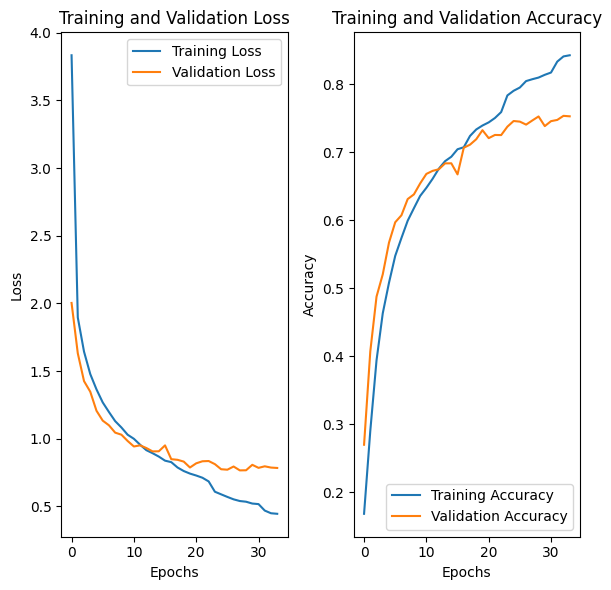

In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7436 - loss: 0.7817
Test Loss: 0.7818523049354553
Test Accuracy: 0.7422000169754028


In [ ]:
# Get predictions for the test set
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


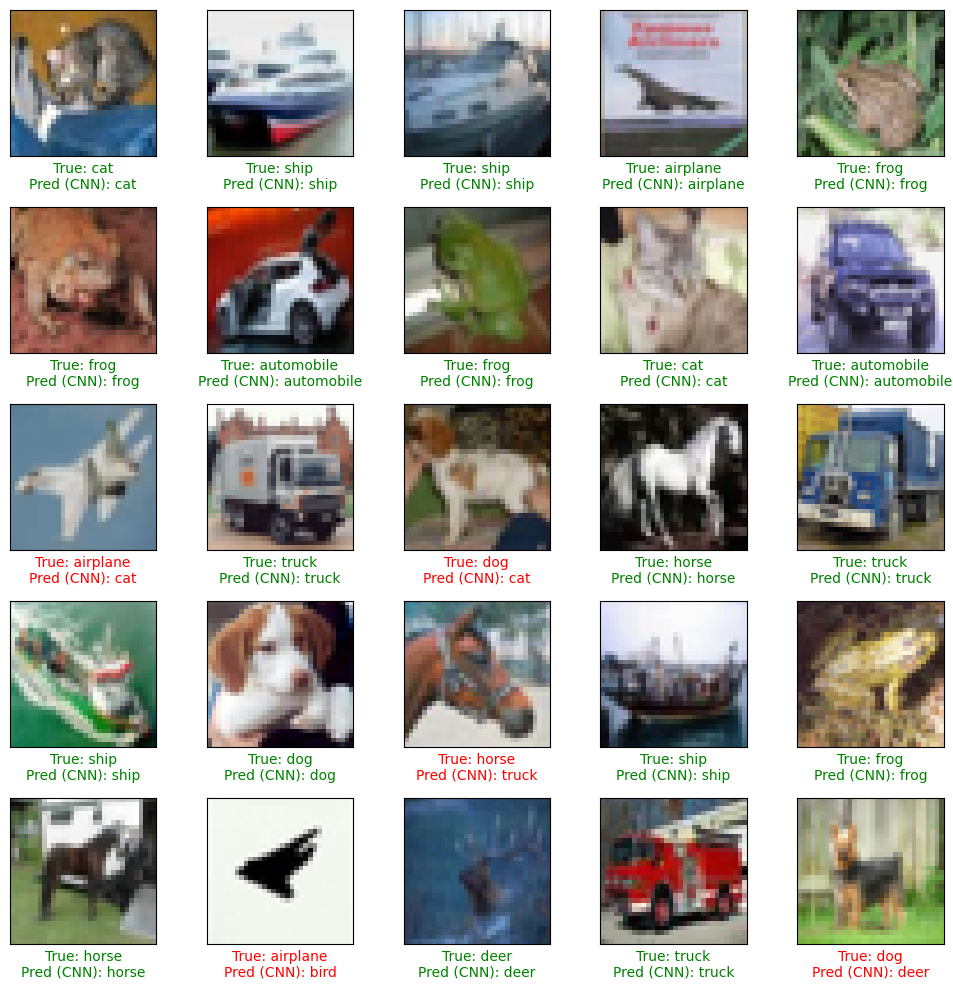

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels_cnn[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

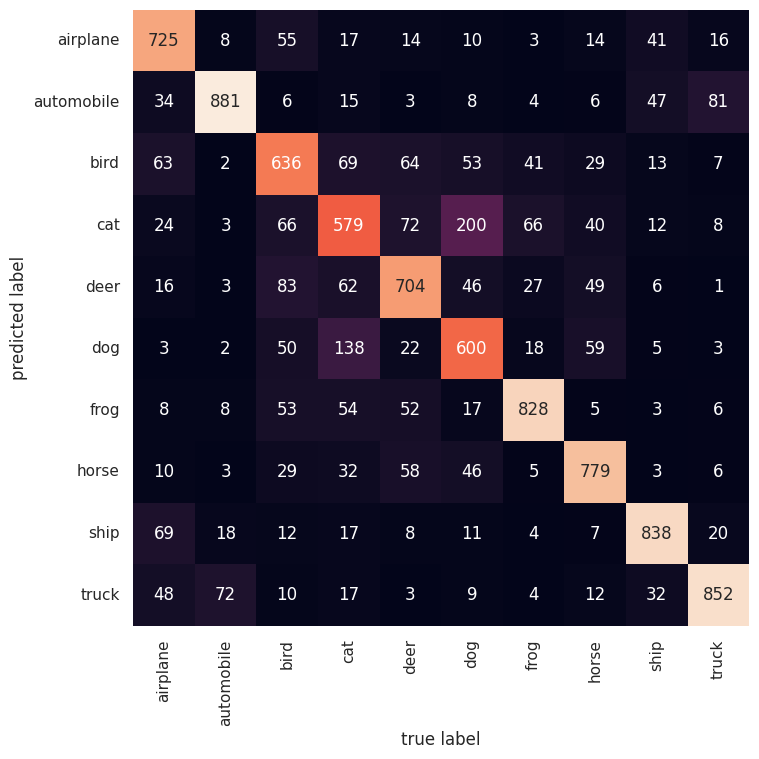

In [ ]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [ ]:
print(classification_report(y_test, predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.80      0.72      0.76      1000
  automobile       0.81      0.88      0.85      1000
        bird       0.65      0.64      0.64      1000
         cat       0.54      0.58      0.56      1000
        deer       0.71      0.70      0.71      1000
         dog       0.67      0.60      0.63      1000
        frog       0.80      0.83      0.81      1000
       horse       0.80      0.78      0.79      1000
        ship       0.83      0.84      0.84      1000
       truck       0.80      0.85      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



## Adding Batch Normalization

In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.InputLayer(input_shape=(32,32, 3)))
cnn_model.add(layers.Conv2D(40, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(70, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Conv2D(64, (3, 3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation('relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Conv2D(14, (3, 3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation('relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 40)     │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 70)     │        25,270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │        40,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 14)       │         8,078 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 14)       │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 8, 14)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 14)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,254 (411.15 KB)

 Trainable params: 105,098 (410.54 KB)

 Non-trainable params: 156 (624.00 B)

In [ ]:
callbacks = [
keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
]

In [ ]:
cnn_history = cnn_model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=256,
                    validation_split=0.2,callbacks=callbacks)

Epoch 1/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.2577 - loss: 2.0664 - val_accuracy: 0.4175 - val_loss: 1.5825 - learning_rate: 0.0010
Epoch 2/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4693 - loss: 1.4441 - val_accuracy: 0.4625 - val_loss: 1.4842 - learning_rate: 0.0010
Epoch 3/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5579 - loss: 1.2347 - val_accuracy: 0.5657 - val_loss: 1.2217 - learning_rate: 0.0010
Epoch 4/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6113 - loss: 1.0914 - val_accuracy: 0.6488 - val_loss: 0.9842 - learning_rate: 0.0010
Epoch 5/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6500 - loss: 0.9819 - val_accuracy: 0.6499 - val_loss: 0.9835 - learning_rate: 0.0010
Epoch 6/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6746 - loss: 0.9173 - val_accuracy: 0.6694 - val_loss: 0.9522 - learning_rate: 0.0010
Epoch 7/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6875 - loss: 0

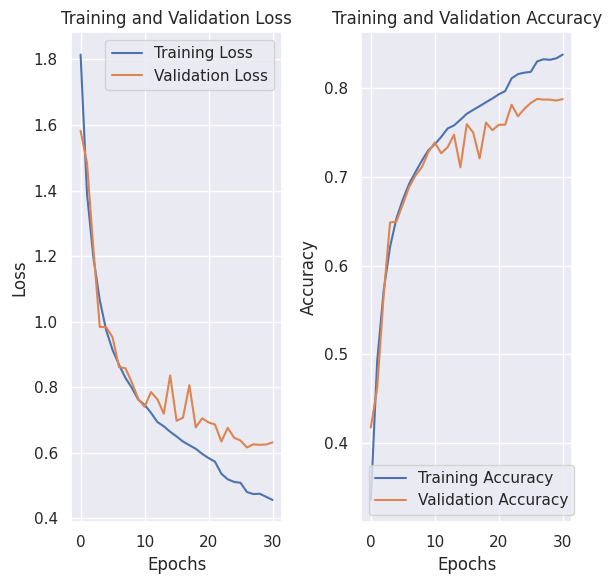

In [ ]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7851 - loss: 0.6249
Test Loss: 0.6313946843147278
Test Accuracy: 0.7814000248908997


In [ ]:
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


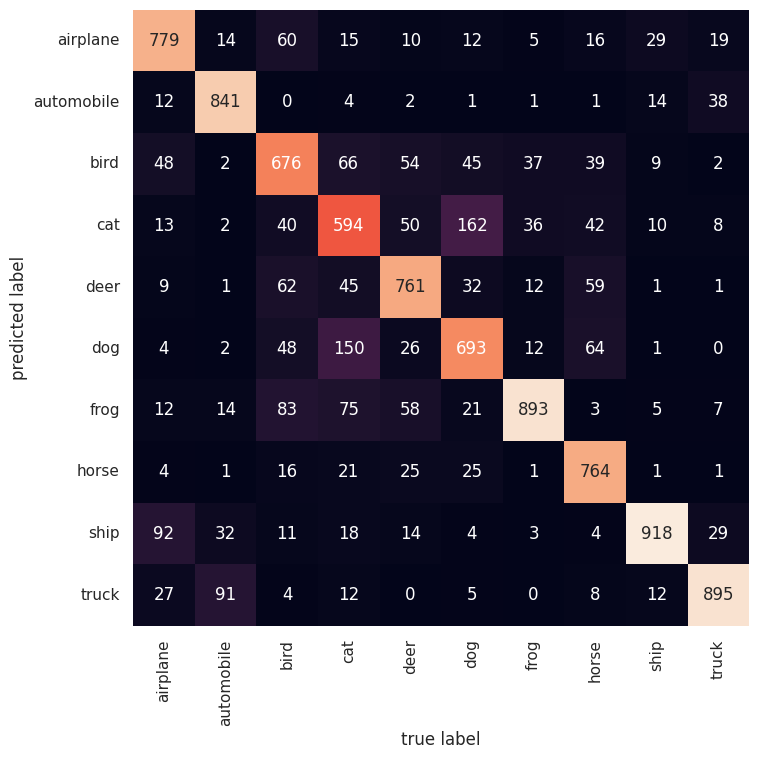

In [ ]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [ ]:
print(classification_report(y_test, predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.81      0.78      0.80      1000
  automobile       0.92      0.84      0.88      1000
        bird       0.69      0.68      0.68      1000
         cat       0.62      0.59      0.61      1000
        deer       0.77      0.76      0.77      1000
         dog       0.69      0.69      0.69      1000
        frog       0.76      0.89      0.82      1000
       horse       0.89      0.76      0.82      1000
        ship       0.82      0.92      0.86      1000
       truck       0.85      0.90      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



There is a significant improvement in classification of all labels by using batch normalization. Convergence is also relatively faster and smother training as compared to without it.